In [5]:
import os
import pandas as pd

In [6]:
os.chdir("C:\CLASS DATA SETS")

In [7]:
sd = pd.read_csv("Tractor-Sales.csv")

In [8]:
sd.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [9]:
sd.describe(include="object")

,Month-Year
count,144
unique,144
top,Feb-13
freq,1


In [10]:
sd.describe()

,Number of Tractor Sold
count,144.000000
mean,389.694444
std,171.500016
min,138.000000
25%,248.500000
50%,369.000000
75%,509.250000
max,871.000000


In [13]:
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.tsa.api as  smt
%matplotlib inline

In [14]:
sd.shape

(144, 2)

In [15]:
dates = pd.date_range(start = "2003-01-01" , freq = "MS", periods = len(sd))

In [16]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [18]:
import calendar

In [19]:
sd["Month"] = dates.month

In [22]:
sd["Month"]= sd["Month"].apply(lambda x :calendar.month_abbr[x])

In [23]:
sd.head()

,Month-Year,Number of Tractor Sold,Month
0,Jan-03,141,Jan
1,Feb-03,157,Feb
2,Mar-03,185,Mar
3,Apr-03,199,Apr
4,May-03,203,May


In [25]:
sd["Year"] = dates.year

In [26]:
sd.head()

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [27]:
sd.drop("Month-Year",axis = 1,inplace = True)

In [28]:
sd.head()


,Number of Tractor Sold,Month,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [29]:
sd.set_index(dates,inplace = True)

In [30]:
sd.head()

,Number of Tractor Sold,Month,Year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


In [33]:
sales_ts = sd["Number of Tractor Sold"]

Text(0, 0.5, '\tNumber of Tractor Sold')

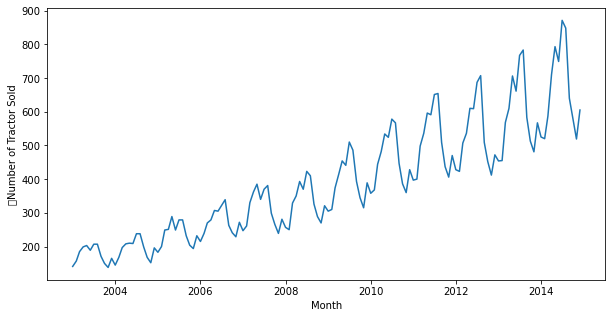

In [36]:
plt.figure(figsize = (10,5))
plt.plot(sales_ts)
plt.xlabel("Month")
plt.ylabel("	Number of Tractor Sold")

Text(0, 0.5, '\tNumber of Tractor Sold')

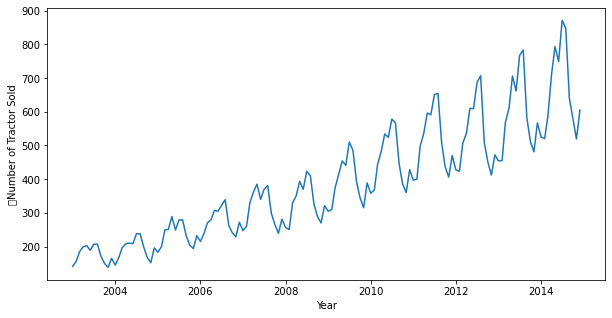

In [37]:
plt.figure(figsize = (10,5))
plt.plot(sales_ts)
plt.xlabel("Year")
plt.ylabel("	Number of Tractor Sold")

In [45]:
#determine rolling stats 
#rolling is function and windows is time period
rolstd = sales_ts.rolling(window=12).std()
rolmean = sales_ts.rolling(window=12).mean()

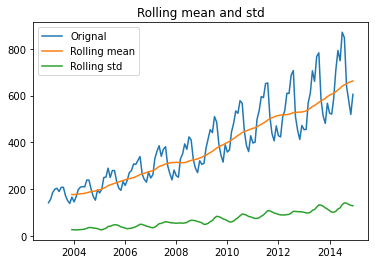

In [46]:
#ploting rollstats
orig = plt.plot(sales_ts,label = "Orignal")
mean = plt.plot(rolmean,label = "Rolling mean")
std = plt.plot(rolstd , label = "Rolling std")
plt.legend(loc = "best")
plt.title("Rolling mean and std")
plt.show(block=False)

In [47]:
monthly_sd = pd.pivot_table(sd,values = "Number of Tractor Sold",columns = "Year",index = "Month")
monthly_sd = monthly_sd.reindex(index = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

In [48]:
monthly_sd

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


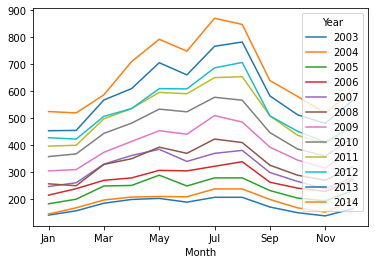

In [49]:
monthly_sd.plot()

In [55]:
year_sd = pd.pivot_table(sd,values = "Number of Tractor Sold",columns = "Month",index = "Year")
year_sd = year_sd[ ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]]

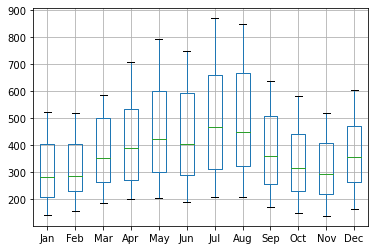

In [57]:
year_sd.boxplot()

In [84]:
#decompose means diving time series in different parts 
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')

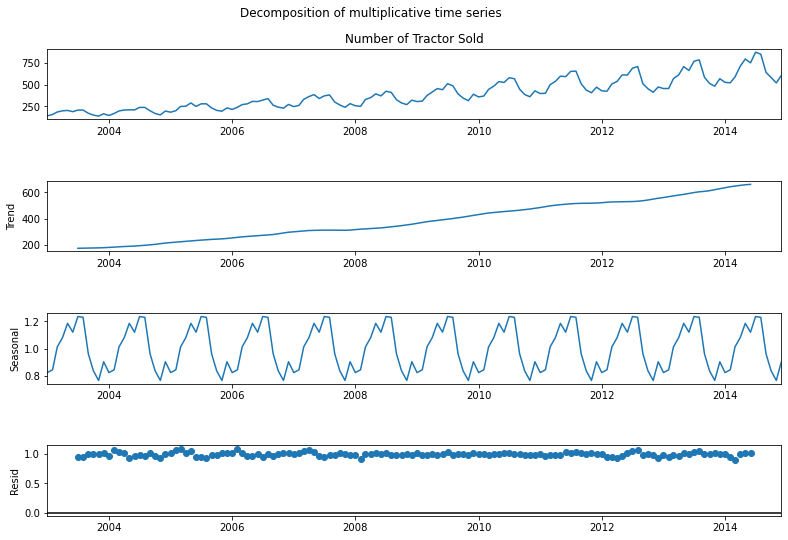

In [85]:
fig = decompose.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle("Decomposition of multiplicative time series")
plt.show()

In [86]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [87]:
import warnings

In [89]:
#In plain words, AIC is a single number score that can be used to determine which of multiple models -
# -is most likely to be the best model for a given dataset.Lower the value of aic better is the fit
# aic = -2ln(L) + 2p
#where l is log likelyhood  and p is no of parameters
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sales_ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [90]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 799.9064282669851 for model SARIMAX(3, 1, 0)x(3, 1, 1, 12)


In [91]:
mod = sm.tsa.statespace.SARIMAX(sales_ts,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

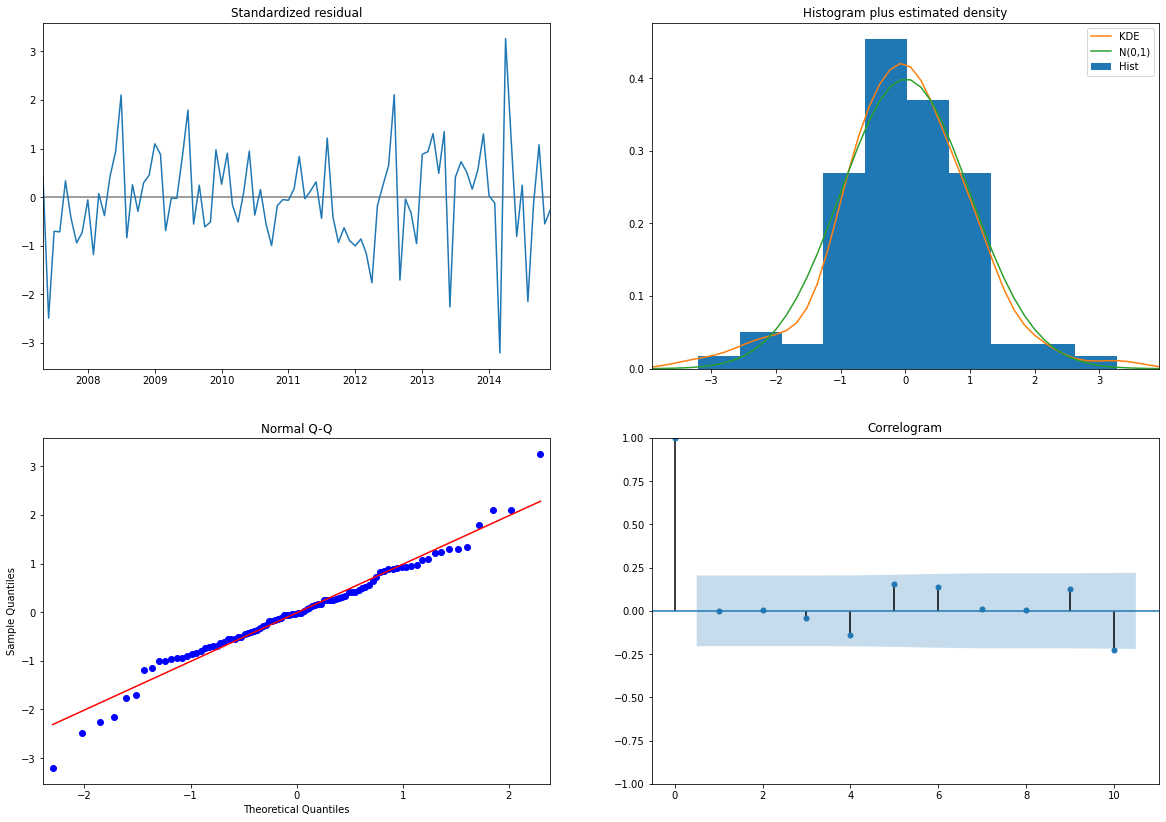

In [92]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()


In [93]:
pred1 = results.get_prediction(start='2003-01-01', dynamic=True)
pred1_ci = pred1.conf_int()

In [94]:
pred2 = results.get_forecast('2015-01-01')
pred2_ci = pred2.conf_int()


In [95]:
#1-step ahead forecasting implies that each forecasted point is used to predict the 
#following one.
pred0 = results.get_prediction(start='2003-01-01', dynamic=False)
pred0_ci = pred0.conf_int()

#In sample prediction with dynamic forecasting of the last year  
#Again, the model is used to predict data that the model was built on.
pred1 = results.get_prediction(start='2003-01-01', dynamic=True)
pred1_ci = pred1.conf_int()

#"True" forecasting of out of sample data. 
#In this case the model is asked to predict data it has not seen before.
pred2 = results.get_forecast('2016-01-01')
# Give the end year till you want forecast
pred2_ci = pred2.conf_int()

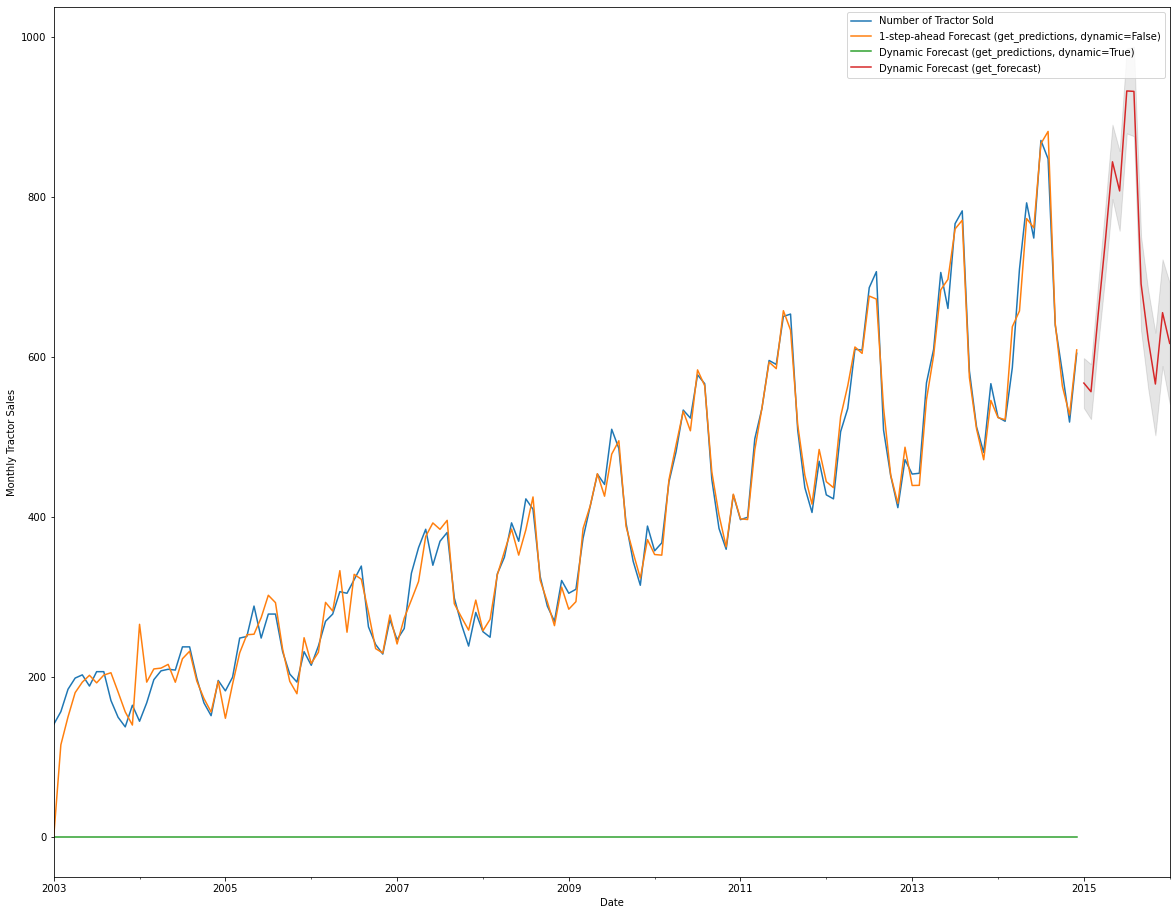

In [96]:
#Plot the predicted values
ax = sales_ts.plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly Tractor Sales')
plt.xlabel('Date')
plt.legend()
plt.show()